# Homework 8
12110418 庄子鲲
### Problem 1:
Using Python and Numpy, write a class named MCLogisticRegression, which implements the mult-class logistic regression model.

1. Preprocess the data: insert a column filled with 1 to the front of the input X. Randomly generate the weights according to a normal distribution.
2. Do forward propagation by One-of-K encoding, where 
    $$
    z_k=\mathbf{w}_k^{T}\mathbf{x}+w_0
    $$
    $$
    p(C_k|\mathbf{x})=y_k(\mathbf{x})=\frac{\exp(z_k)}{\sum_j\exp(z_j)}
    $$
3. Calculate the Cross-entropy error:
    $$
    E(\mathbf{w_1},...,\mathbf{w_k})=-\sum_{n=1}^{N}\sum_{k=1}^{K}t_k^{(n)}\log[y_k^{(n)}(\mathbf{x_k}^{(n)})]
    $$
4. According to the Cross-entropy error, calculate the gradient of the weights:
    $$
    \frac{\partial E}{\partial w_{k,i}}=\sum_{n=1}^{N}(y_k^{(n)}-t_k^{(n)})
    $$
5. Train the model by gradient decent until the num_iterations.
6. Calculate the accuracy of the model:
    1.  Predict the output of a testing set.
    2.  Compare the largest element of the output to the largest element of the real value.
    3.  Add the same value up and devide by the length of the output demension, which is the accuracy.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
class MCLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    # Preprocess the data
    def preprocess(self,X,y):
        self.X=np.insert(X,0,1,axis=1)
        self.y=y
        np.random.seed(1)
        self.w=np.random.randn(X.shape[1]+1,self.y.shape[1])/np.sqrt(X.shape[1]+1)
        
    # Forward propagation
    def forward(self):
        self.z=np.dot(self.X,self.w)
        self.y_pred=np.exp(self.z)/np.sum(np.exp(self.z),axis=1,keepdims=True)
    
    # Cross-entropy error
    def lossFunction(self):
        self.loss=-np.sum(self.y*np.log(self.y_pred+1e-10))
        
    # Gradient of weights
    def gradient(self):
        self.w_gradient=np.dot(self.X.T,self.y_pred-self.y)
        
    # Use gradient descent to train the model
    def train(self,X,y):
        loss=[]
        self.preprocess(X,y)
        for i in range(self.num_iterations+1):
            self.forward()
            self.lossFunction()
            self.gradient()
            self.w-=self.learning_rate*self.w_gradient
            if self.loss<0.01:
                break
            if i%10==0:
                los=self.loss
                loss.append(los)
                print('Epoch: ', i,'loss:',self.loss)
        # Plot the loss curve
        plt.plot(range(0, self.num_iterations + 1, 10), loss)
        plt.xlabel('Loop')
        plt.ylabel('Loss')
        plt.title('Loop-MSE Graph, learning rate = 0.01')
        plt.grid(True)
        plt.show()
    
    # Predict the output
    def predict(self,X):
        X=np.insert(X,0,1,axis=1)
        z=np.dot(X,self.w)
        y_pred=np.exp(z)/np.sum(np.exp(z),axis=1,keepdims=True)
        return y_pred
    
    # Predict and calculate the accuracy
    def accuracy(self,X,y):
        y_pred=self.predict(X)
        y_pred=np.argmax(y_pred,axis=1)
        y=np.argmax(y,axis=1)
        return np.sum(y_pred==y)/len(y)
                
        

### Problem 2:
Use the mult-class logistic regression model to address the multi-class classification for hand-written digits. The training data set is in optdigits.tra and the test dataset is optdigits.tes. In both training and test set, the columns from 0 to 63 are input features, representing the gray values of 8-by-8 pixels of an image, while the column 64 refers to the output category (labelled from0 to 9).

When using a training set or a testing set, transform the output to the One-Hot form, where
    $$
    t=[0,...,1,...,0,0]^T
    $$

(3823, 64) (3823, 10)
Epoch:  0 loss: 46231.13817704055
Epoch:  10 loss: 47938.34958714099
Epoch:  20 loss: 4141.834909607625
Epoch:  30 loss: 2884.5269414550357
Epoch:  40 loss: 2502.8097587219972
Epoch:  50 loss: 2220.3077319496856
Epoch:  60 loss: 2128.611567843327
Epoch:  70 loss: 1955.9085165004371
Epoch:  80 loss: 1815.4315372474348
Epoch:  90 loss: 1663.0769883672197
Epoch:  100 loss: 1505.748596058233
Epoch:  110 loss: 1420.5875260357911
Epoch:  120 loss: 1405.9999805353516
Epoch:  130 loss: 1274.6705313939153
Epoch:  140 loss: 1115.4259418971815
Epoch:  150 loss: 1079.870525905644
Epoch:  160 loss: 1034.4031009081748
Epoch:  170 loss: 1145.8117269269742
Epoch:  180 loss: 8146.233835659638
Epoch:  190 loss: 5069.033341278224
Epoch:  200 loss: 1294.6088321075702
Epoch:  210 loss: 1103.1055653621695
Epoch:  220 loss: 994.1363530298454
Epoch:  230 loss: 939.2310924974643
Epoch:  240 loss: 886.5534787788415
Epoch:  250 loss: 845.6269909878077
Epoch:  260 loss: 818.2029606246953
Epo

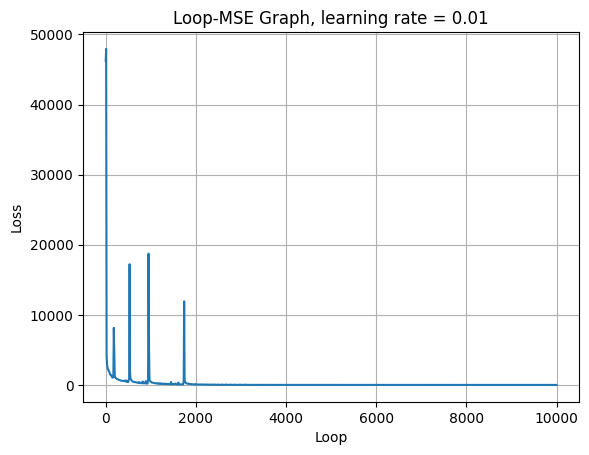

Accuracy:  0.9443516972732332


In [16]:
# Create training set
trainingSet=np.loadtxt('optdigits.tra',delimiter=',')
n=trainingSet.shape[0]
X_train=trainingSet[:,:-1]
y_train=np.zeros((n,10))
for i in range(n):
    y_train[i,int(trainingSet[i,-1])]=1

# Train the model
model=MCLogisticRegression(learning_rate=0.00012,num_iterations=10000)
model.train(X_train,y_train)

# Create test set
testSet=np.loadtxt('optdigits.tes',delimiter=',')
n1=testSet.shape[0]
X_test=testSet[:,:-1]
y_test=np.zeros((n1,10))
for i in range(n1):
    y_test[i,int(testSet[i,-1])]=1
    
# Test the model and print accuracy
print('Accuracy: ',model.accuracy(X_test,y_test))